In [2947]:
import numpy as np 
from matplotlib import pyplot as plt
import sklearn.linear_model
import seaborn as sns
import pandas as pd 
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
# we take everyfeature and see if we have relation between them / if feature has a strong effect on gradethe i will select it to pridict the future grade 


In [2948]:
st = pd.read_csv(r'C:\Users\ayoya\OneDrive\Documents\student-mat.csv') #we read the data from file #panda library 
df = pd.DataFrame(st)
columns = list(st.columns) #assign the feature in list #panda library 
print(columns)


['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [2949]:
st.info()
print ("The number of NULL value in dataset :" ,st.isna().sum().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [2950]:
st.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [2951]:
print (st['G3'].describe()) #describe data we have 

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


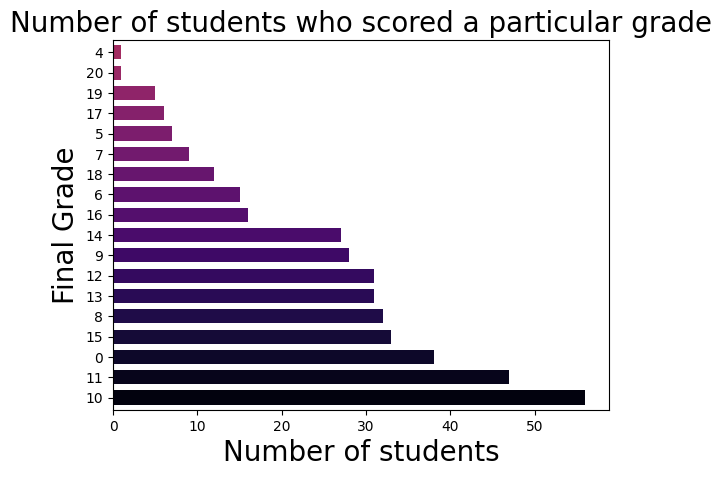

In [2952]:
grade_counts = st['G3'].value_counts().plot.barh( width=.7   ,    color=sns.color_palette('inferno',40)) 
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=20)
grade_counts.set_xlabel('Number of students', fontsize=20 )
grade_counts.set_ylabel('Final Grade', fontsize=20)
plt.show()

In [2953]:
males = len(st[st['sex']=='M'])
female = len (st[st['sex']=='F'])
print("the number of males :",males)
print("the number of femals :",female)

the number of males : 187
the number of femals : 208


In [2954]:

urban = len (st[st['address']== 'U'])
rural = len (st[st['address']=='R'])
print("the number of urban students :",urban)
print("the number of rural students :",rural)

the number of urban students : 307
the number of rural students : 88


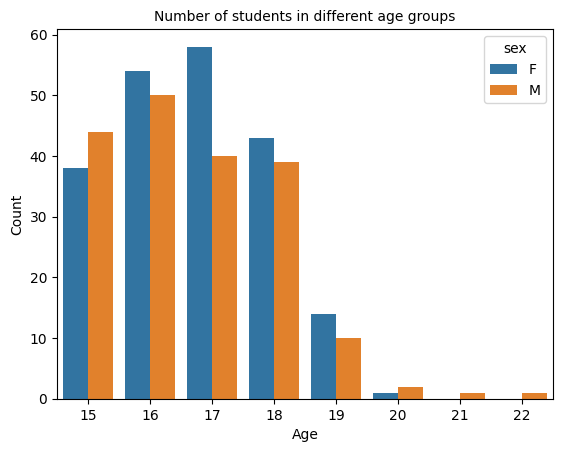

In [2955]:
b = sns.countplot(x='age',hue='sex', data=st) #hue = tha discription for gragh 
b.axes.set_title('Number of students in different age groups',fontsize=10)
b.set_xlabel("Age",fontsize=10)
b.set_ylabel("Count",fontsize=10)
plt.show()

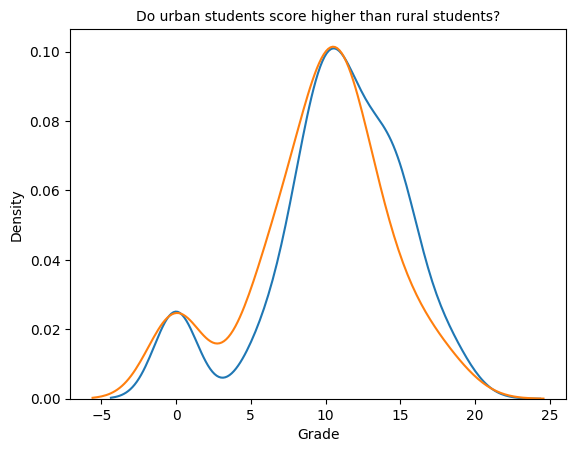

In [2956]:
sns.kdeplot(st.loc[st['address'] == 'U', 'G3'], label='Urban')
sns.kdeplot(st.loc[st['address'] == 'R', 'G3'], label='Rural')
plt.title('Do urban students score higher than rural students?', fontsize = 10)
plt.xlabel('Grade', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.show()

In [2957]:
print ("The correlation between G3 and each feature : \n" , st.corr(numeric_only=True)['G3']) #to calculate the correlation between numeric values


The correlation between G3 and each feature : 
 age          -0.161579
Medu          0.217147
Fedu          0.152457
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64


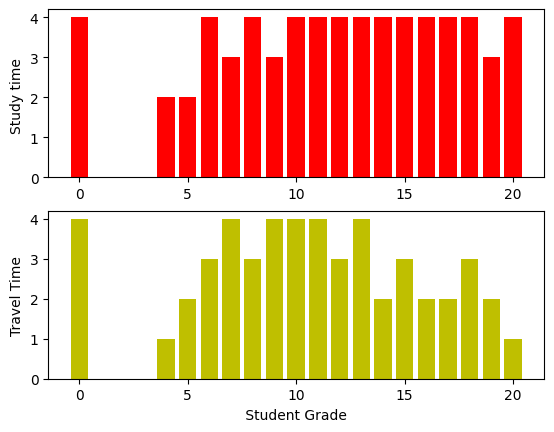

In [2958]:
fig , ax = plt.subplots(2 , 1 , sharey= True)
ax[0].bar(st["G3"] , st["studytime"] ,  color ='r')
ax[1].bar(st["G3"] ,st["traveltime"] , color ='y')
ax[1].set_xlabel(' Student Grade ')
ax[0].set_ylabel('Study time ')
ax[1].set_ylabel('Travel Time')

plt.show()

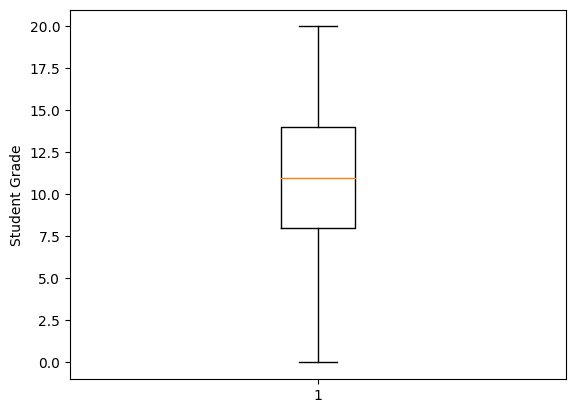

In [2959]:
fig , ax = plt.subplots()
ax.boxplot(st["G3"])
ax.set_ylabel("Student Grade")
plt.show()

In [2961]:
fig , ax = plt.scatter()
ax.plot(x= st["G3"] , y=st["age"])
plt.show()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
category_st = df.select_dtypes(include = ['object'])
columns = list(category_st.columns) 
print(columns)


['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [ ]:
dummy_st = pd.get_dummies(category_st) #one_hot encoding 
dummy_st.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0


In [ ]:
dummy_st['G3'] = st['G3'] #back G3 to dataframe
dummy_st.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,10


In [ ]:
dummy_st.corr()['G3'].sort_values().abs() #calculate correlation and sort it in ascending order


higher_no            0.182465
romantic_yes         0.129970
Mjob_at_home         0.115634
address_R            0.105756
sex_F                0.103456
paid_no              0.101996
reason_course        0.098950
internet_no          0.098483
Mjob_other           0.096477
guardian_other       0.087774
schoolsup_yes        0.082788
famsize_GT3          0.081407
Pstatus_T            0.058009
Fjob_other           0.053483
nursery_no           0.051568
school_MS            0.045017
famsup_yes           0.039157
reason_home          0.021359
Fjob_services        0.016108
activities_no        0.016100
Fjob_at_home         0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_


st = st.drop(['school','G1'] , axis='columns')
st.head()

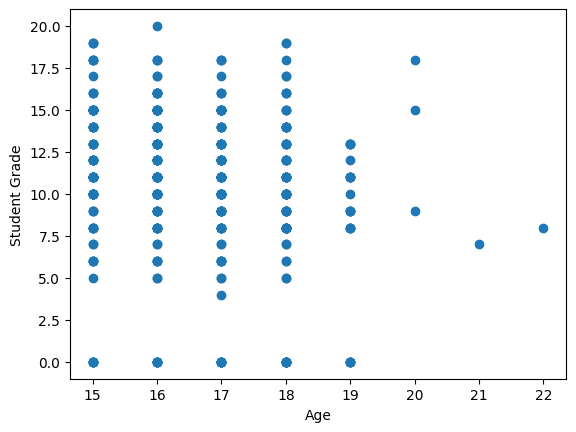

In [ ]:
fig , ax = plt.subplots()
ax.scatter( st["age"],st["G3"] )
ax.set_ylabel("Student Grade")
ax.set_xlabel("Age")
plt.show()

In [ ]:
st.drop(st.index[st['G3']==0] , inplace=True)
y = st['G3']

In [ ]:
st.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
X = st[[ "G1" , 'failures' , 'Medu' ,'Walc' ,'absences' ,'studytime' ]]
X = pd.get_dummies(X)
X.head()

,G1,failures,Medu,Walc,absences,studytime
0,5,0,4,1,6,2
1,5,0,1,1,4,2
2,7,3,1,3,10,2
3,15,0,4,1,2,3
4,6,0,3,2,4,2


In [ ]:
y.describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((214, 6), (214,), (143, 6), (143,))

In [ ]:

regression.fit(X_train , y_train)
regression.score(X_test  , y_test)*100



81.46088567468162